In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.88
Loading CCF brain structure data...
Loading time: 0.00
Loading selected CCF Atlas and Contour data...
Loading time: 0.89


In [2]:
ns = nmt.neuron_set('/home/penglab/FeaCal/Janelia_1000_rm')

Loading...
100 loaded: 4.1s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc
200 loaded: 3.9s
300 loaded: 4.1s
400 loaded: 5.0s
Invalid number of soma found: 0
QC failed: AA0472.swc
500 loaded: 4.2s
Invalid number of soma found: 0
QC failed: AA0576.swc
Invalid number of soma found: 0
QC failed: AA0585.swc
Invalid number of soma found: 0
QC failed: AA0589.swc
600 loaded: 4.0s
Invalid number of soma found: 0
QC failed: AA0639.swc
Invalid number of soma found: 0
QC failed: AA0670.swc
Invalid number of soma found: 0
QC failed: AA0672.swc
700 loaded: 3.8s
Invalid number of soma found: 0
QC failed: AA0754.swc
Invalid number of soma found: 0
QC failed: AA0763.swc
800 loaded: 4.2s
900 loaded: 3.2s
QC failed: AA0952.swc
QC failed: AA0964.swc
QC failed: AA0968.swc
QC failed: AA0977.swc
Finding soma locations...
Getting projection features...
Number of input neurons: 987
Number of input features: 632
Getting metadata...


In [37]:
selectedNS= ns.metadata[ns.metadata['CellType']== 'SUB']
#selectedNS = selectedNS.append(ns.metadata[ns.metadata['CellType']== 'ProS'])


In [79]:
ns.metadata

,SomaRegion,Hemisphere,CellType,Cluster
AA0001,SSp-m,Left,SSp-m,0
AA0002,MOp,Left,MOp,0
AA0003,MOp,Left,MOp,0
AA0004,MOp,Left,MOp,0
AA0005,MOp,Left,MOp,0
AA0006,MOp,Left,MOp,0
AA0007,SSp-ul,Left,SSp-ul,0
AA0008,SSp-ul,Left,SSp-ul,0
AA0009,MOp,Left,MOp,0
AA0010,MOs,Left,MOs,0


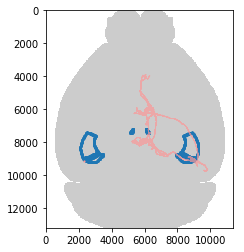

In [38]:
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
fig, ax =  plt.subplots(1,1)
border_line("Horizontal", 100, regions=['SUB','ProS','CA1'], ax=ax, bkground_ON = False)

cell_in_map(ns.neurons, ['AA0697'], ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="cluster",alpha=1, ax=ax)

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


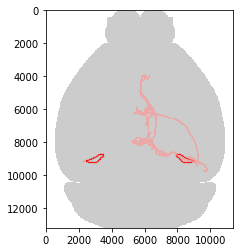

In [39]:
fig, ax =  plt.subplots(1,1)
border_line2("Horizontal", 100, regions=['SUB'], ax=ax, bkground_ON = False)

cell_in_map(ns.neurons, ['AA0697'], ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="cluster",alpha=1, ax=ax)

In [40]:


def show_Neuron(viewINPUT, positionINPUT, outputPATH):
    NeuronAll = []
    num_neuron = 10
    count_c = 0
    for iterC in list(selectedNS.index.tolist()):
        NeuronAll.append(list(selectedNS.index.tolist())[count_c:(count_c + num_neuron)])
        count_c = count_c + num_neuron

    i = 0
    j = 0
    fig, ax = plt.subplots(len(NeuronAll)//5+1,5, figsize=(7.5, 10))
    #for iterc,iterL in zip(list(ns.metadata['Cluster'].unique())[:20],NeuronAll):
    for iterL in NeuronAll:
        if i % 5 == 0 and i !=0:
            i = 0
            j = j+1
        border_line(viewINPUT, positionINPUT, regions=['SUB'], ax=ax[j,i], bkground_ON = False)
        cell_in_map(ns.neurons, iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                    view="Horizontal", color="single_cell",alpha=1,ax=ax[j,i])
        ax[j,i].title.set_text(str(len(iterL)))#+str(iterc))
        ax[j,i].axis('off')
        i = i+1

    plt.savefig(outputPATH, bbox_inches='tight')
    plt.show()



In [55]:
import colorlover as cl
from neuro_morpho_toolbox.plot import rgb_to_list
def get_single_region_colors(region_list, palette="paired", return_str=False):
    bupu = cl.scales['9']['seq']['BuPu']           
    greens = cl.scales['9']['seq']['Greens']        
    set2 = cl.scales['7']['qual']['Set2']           
    spectral = cl.scales['9']['div']['Spectral']   
    paired = cl.scales['10']['qual']['Paired']     
    mpl_colors = []
    for i in range(9):
        tp = []
        for j in list(mpl.colors.to_rgb("C" + str(i))):
            tp.append(str(int(j * 255)))
        tp = ", ".join(tp)
        tp = "rgb(" + tp + ")"
        mpl_colors.append(tp)
    
    my_palette_dict = {"bupu":bupu,
                   "greens":greens,
                   "set2":set2,
                   "spectral":spectral,
                   "paired":paired,
                   "matplotlib":mpl_colors
                   }    
    margin=0.05
    u_regions = list(set(region_list))
    color_list = cl.to_rgb(cl.interp(my_palette_dict[palette], len(u_regions)))
    if not return_str:
        color_list = [rgb_to_list(i) for i in color_list]
    group_colors = dict(zip(u_regions, color_list))
    return group_colors



ccf_Contour = np.multiply(nmt.ccfArray,nmt.Contour01)
import matplotlib as mpl
def border_line2(view, position, regions=None, ax=None, bkground_ON = False):
    bupu = cl.scales['9']['seq']['BuPu']           
    greens = cl.scales['9']['seq']['Greens']        
    set2 = cl.scales['7']['qual']['Set2']           
    spectral = cl.scales['9']['div']['Spectral']   
    paired = cl.scales['10']['qual']['Paired']     
    mpl_colors = []
    for i in range(9):
        tp = []
        for j in list(mpl.colors.to_rgb("C" + str(i))):
            tp.append(str(int(j * 255)))
        tp = ", ".join(tp)
        tp = "rgb(" + tp + ")"
        mpl_colors.append(tp)
    
    my_palette_dict = {"bupu":bupu,
                   "greens":greens,
                   "set2":set2,
                   "spectral":spectral,
                   "paired":paired,
                   "matplotlib":mpl_colors
                   }    
    margin=0.05
    dpi=80
    enlarge=1.5
    alpha=0.5
    ccf_annotation = nmt.annotation
    # Background image
    nda = np.empty([0, 0])
    xspace = 0
    yspace = 0
    if view.lower() == "coronal":
        nda = (np.max(ccf_annotation.array, axis=0) > 0)  # 3D -> 2D projection
        xspace = ccf_annotation.space['z']
        yspace = ccf_annotation.space['y']
    if view.lower() == "horizontal":
        nda = (np.max(ccf_annotation.array, axis=1) > 0)
        xspace = ccf_annotation.space['z']
        yspace = ccf_annotation.space['x']
    if view.lower() == "sagittal":
        nda = (np.max(ccf_annotation.array, axis=2) > 0).transpose()
        xspace = ccf_annotation.space['y']
        yspace = ccf_annotation.space['x']

    xsize = nda.shape[1]
    ysize = nda.shape[0]

    # Figure settings
    if ax is None:
        figsize = (1 + margin) * xsize * enlarge / dpi, (1 + margin) * ysize * enlarge / dpi
        fig = plt.figure(figsize=figsize, dpi=dpi)
        # Make the axis the right size...
        ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])

    extent = (0, xsize * xspace, ysize * yspace, 0)
    if bkground_ON:
        ax.imshow(nda, cmap="Greys", alpha=0.1, extent=extent)
    else:
        ax.imshow(nda, cmap="Greys", alpha=0.0, extent=extent)
    if regions != None:
        #regionDIC = get_single_region_colors(regions, palette="paired", return_str=False)
        regionDIC = {"SUB":'red',"ProS":'green',"CA1":'yellow'}
        #print(regionDIC)
        if view.lower() == "coronal":    #x   z,y
            #assert position.all() < nmt.annotation.array.shape[0],"Input position must within the brain region"
            for iter_Region in regions:
                x_range = np.array([])
                y_range = np.array([])
                if type(iter_Region) == str:
                    x_range = np.append(x_range,np.where(ccf_Contour[position,:,:] == nmt.bs.name_to_id(iter_Region))[1])
                    y_range = np.append(y_range,np.where(ccf_Contour[position,:,:] == nmt.bs.name_to_id(iter_Region))[0])
                    ax.scatter(xspace * x_range, yspace* y_range, marker="o",s=0.05,c = regionDIC[iter_Region])
        if view.lower() == "horizontal": #y z,x
            #assert position.all() < nmt.annotation.array.shape[1],"Input position must within the brain region"
            for iter_Region in regions:
                x_range = np.array([])
                y_range = np.array([])
                if type(iter_Region) == str:
                    x_range = np.append(x_range,np.where(ccf_Contour[:,position,:] == nmt.bs.name_to_id(iter_Region))[1])
                    y_range = np.append(y_range,np.where(ccf_Contour[:,position,:] == nmt.bs.name_to_id(iter_Region))[0])
                    ax.scatter(xspace * x_range, yspace* y_range, marker="o",s=0.05,c = regionDIC[iter_Region])
        if view.lower() == "sagittal":   #z  y,x
            #assert position.all() < nmt.annotation.array.shape[2],"Input position must within the brain region"
            for iter_Region in regions:
                x_range = np.array([])
                y_range = np.array([])
                if type(iter_Region) == str:
                    x_range = np.append(x_range,np.where(ccf_Contour[:,:,position] == nmt.bs.name_to_id(iter_Region))[0])
                    y_range = np.append(y_range,np.where(ccf_Contour[:,:,position] == nmt.bs.name_to_id(iter_Region))[1])
                    ax.scatter(xspace * x_range, yspace* y_range, marker="o",s=0.05,c = regionDIC[iter_Region])
    return

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


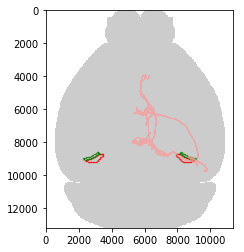

In [14]:
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map

fig, ax =  plt.subplots(1,1)
border_line2("Horizontal", 100, regions=['SUB','ProS'], ax=ax, bkground_ON = False)

cell_in_map(ns.neurons, ['AA0697'], ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="cluster",alpha=1, ax=ax)

## Choose best section for horizontal

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


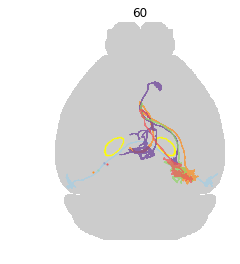

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


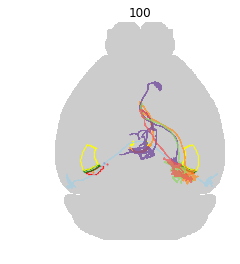

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


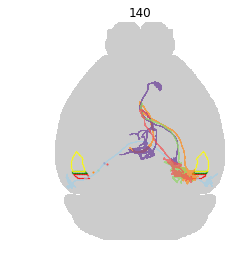

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


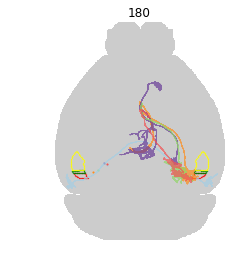

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


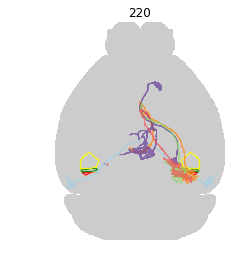

In [19]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "horizontal"
positionINPUT = 100
outputPATH = '/home/penglab/Desktop'
regionList
NeuronAll = []
num_neuron = 5
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iter_p in np.arange(60,240,40):
    positionINPUT = iter_p
    fig, ax = plt.subplots(1,1)
    border_line2(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = False)
    cell_in_map(ns.neurons, NeuronAll[0], ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str(( iter_p)))#+str(iterc))
    ax.axis('off')
    i = i+1
    #plt.savefig(os.path.join(outputPATH,'Cell_in_map_18Dec_' + str(i)+'.pdf'))
    plt.show()


## Generate results for horizontal when it is 100

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


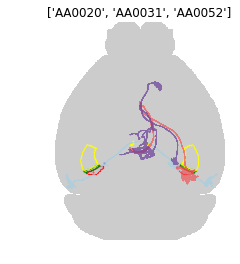

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


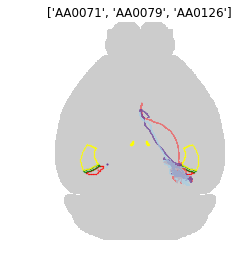

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


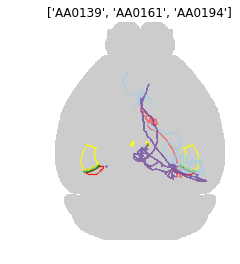

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


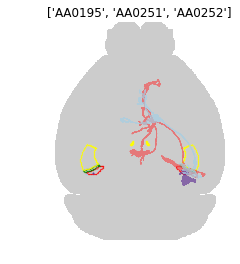

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


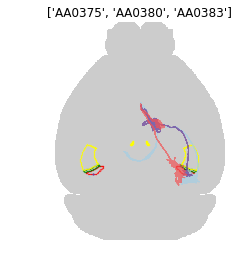

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


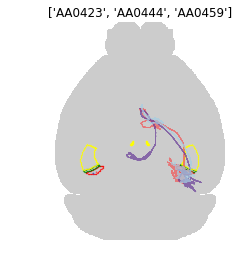

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


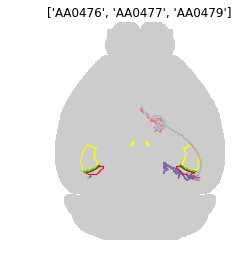

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


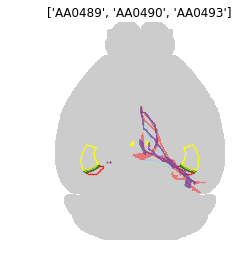

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


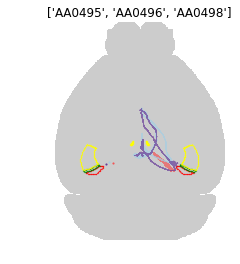

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


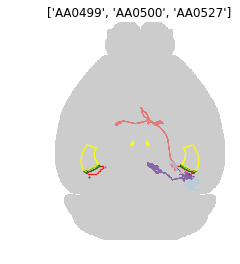

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


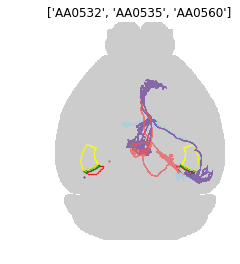

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


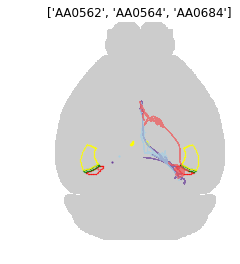

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


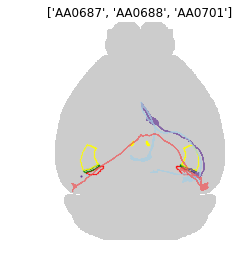

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


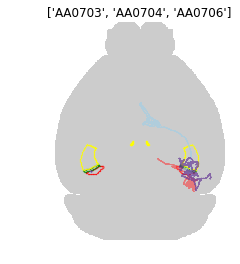

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


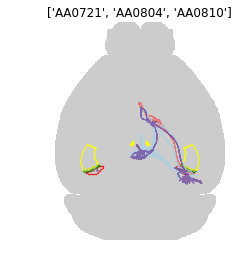

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


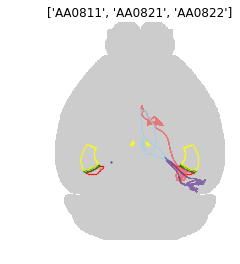

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


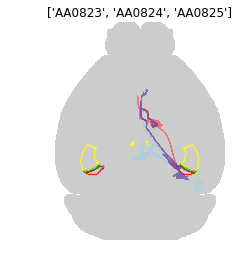

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


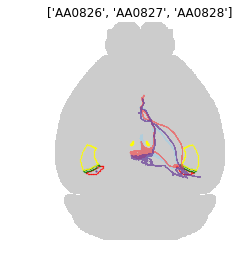

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


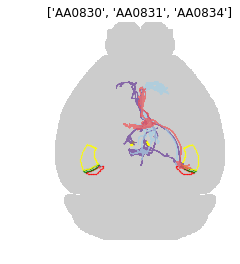

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


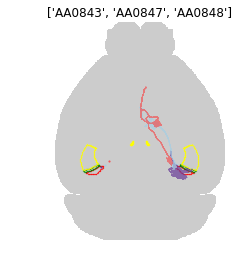

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


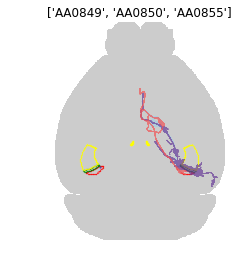

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


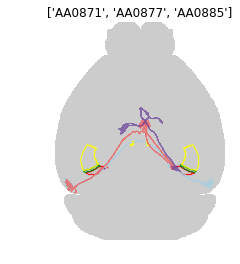

{'SUB': 'red', 'ProS': 'green', 'CA1': 'yellow'}


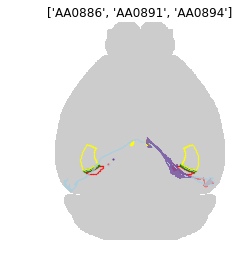

In [43]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "horizontal"
positionINPUT = 100#np.arange(60,240,40)
outputPATH = '/home/penglab/Desktop/SUB(ProS)_neuron'
regionList
NeuronAll = []
num_neuron = 3
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iterL in NeuronAll:
    fig, ax = plt.subplots(1,1)
    if type(positionINPUT)!= int:
        for iter_P in positionINPUT:
            border_line2(viewINPUT, iter_P, regions=regionList, ax=ax, bkground_ON = False)
    else:
        border_line2(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = False)
    cell_in_map(ns.neurons,iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str(iterL))#+str(iterc))
    ax.axis('off')
    i = i+1
    plt.savefig(os.path.join(outputPATH,str(viewINPUT)+'_'+str(iterL)+'.pdf'))
    plt.show()


## Choose best section for Coronal

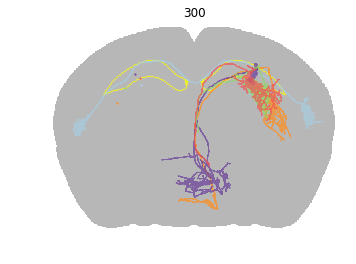

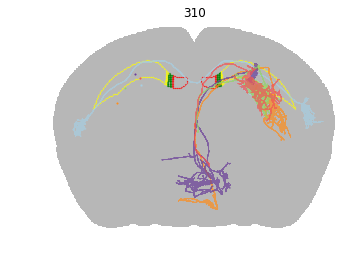

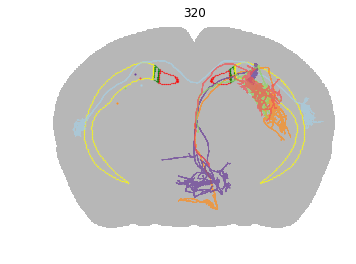

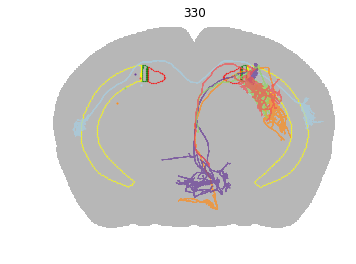

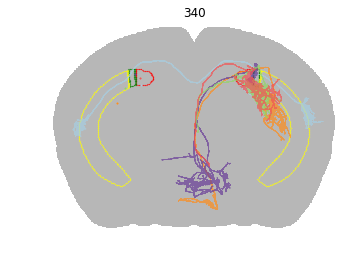

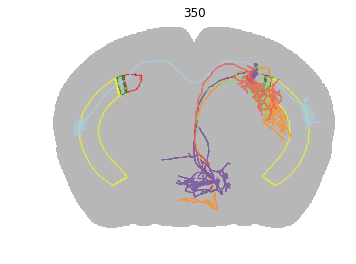

In [54]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "Coronal"
positionINPUT = 100
outputPATH = '/home/penglab/Desktop'
regionList
NeuronAll = []
num_neuron = 5
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iter_p in np.arange(300,360,10):
    positionINPUT = iter_p
    fig, ax = plt.subplots(1,1)
    border_line2(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = True)
    cell_in_map(ns.neurons, NeuronAll[0], ns.metadata, ccf_annotation=nmt.annotation, 
                view=viewINPUT, color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str(( iter_p)))#+str(iterc))
    ax.axis('off')
    i = i+1
    #plt.savefig(os.path.join(outputPATH,'Cell_in_map_18Dec_' + str(i)+'.pdf'))
    plt.show()


## Generate results for horizontal when it is 340

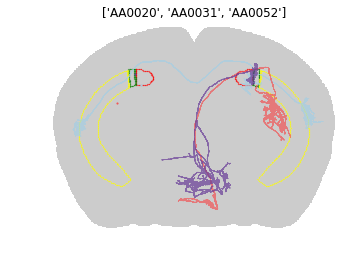

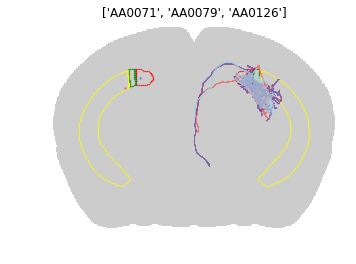

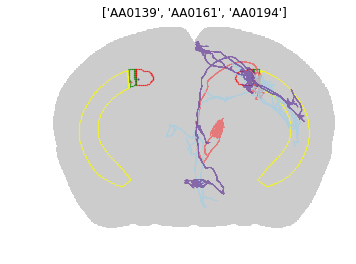

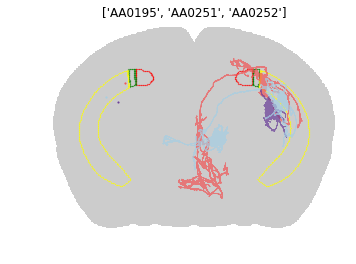

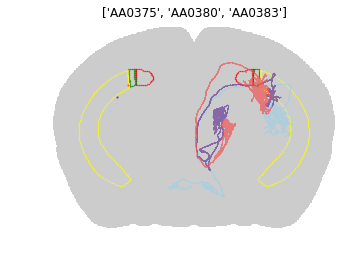

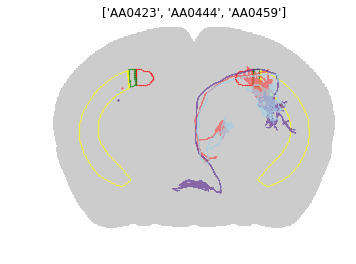

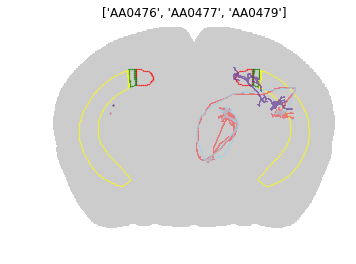

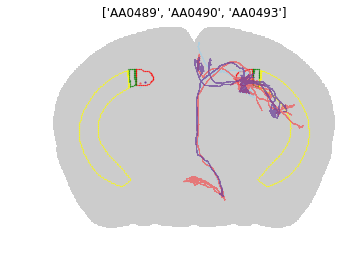

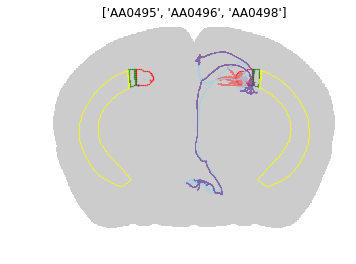

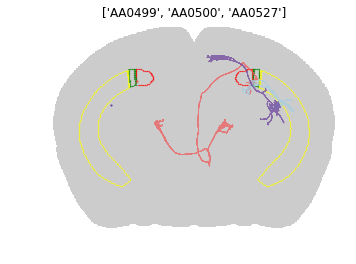

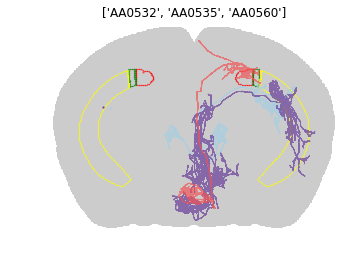

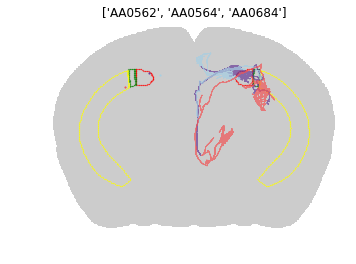

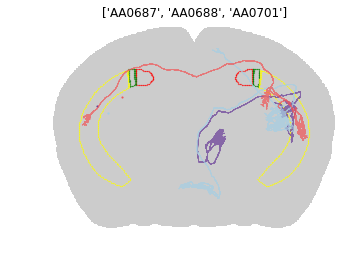

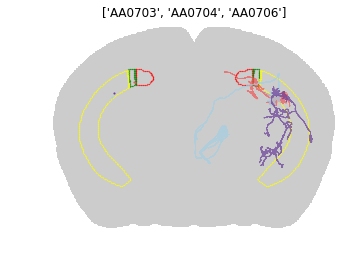

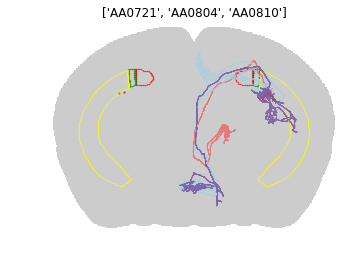

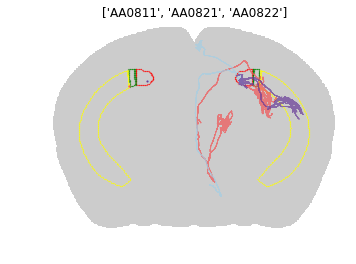

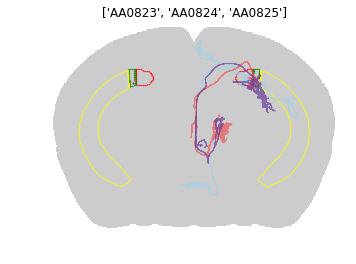

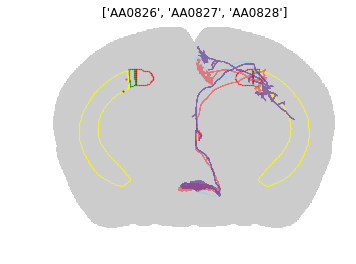

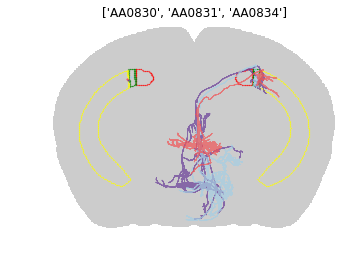

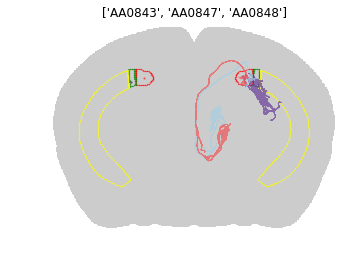

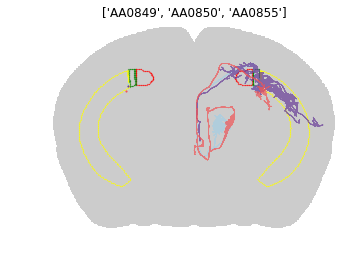

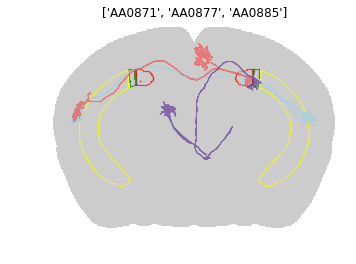

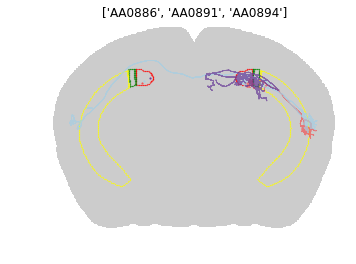

In [56]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "Coronal"
positionINPUT = 340
outputPATH = '/home/penglab/Desktop/SUB(ProS)_neuron'
regionList
NeuronAll = []
num_neuron = 3
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iterL in NeuronAll:
    fig, ax = plt.subplots(1,1)
    if type(positionINPUT)!= int:
        for iter_P in positionINPUT:
            border_line2(viewINPUT, iter_P, regions=regionList, ax=ax, bkground_ON = False)
    else:
        border_line2(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = False)
    cell_in_map(ns.neurons,iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                view=viewINPUT, color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str(iterL))#+str(iterc))
    ax.axis('off')
    i = i+1
    plt.savefig(os.path.join(outputPATH,str(viewINPUT)+'_'+str(iterL)+'.pdf'))
    plt.show()


## Choose best section for sagittal

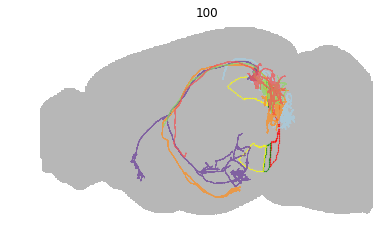

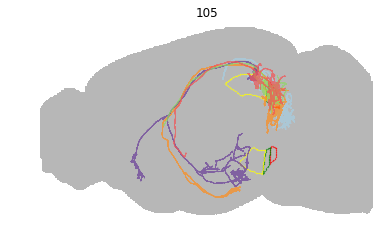

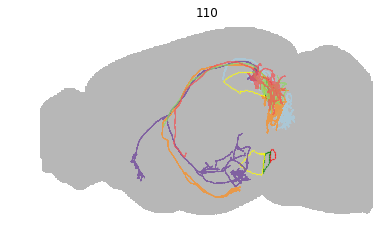

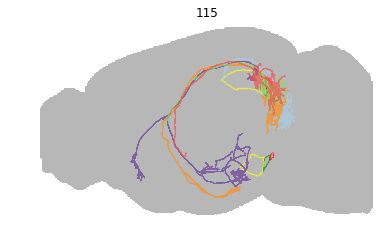

In [60]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "Sagittal"
positionINPUT = 100
outputPATH = '/home/penglab/Desktop'
regionList
NeuronAll = []
num_neuron = 5
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iter_p in np.arange(100,120,5):
    positionINPUT = iter_p
    fig, ax = plt.subplots(1,1)
    border_line2(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = True)
    cell_in_map(ns.neurons, NeuronAll[0], ns.metadata, ccf_annotation=nmt.annotation, 
                view=viewINPUT, color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str(( iter_p)))#+str(iterc))
    ax.axis('off')
    i = i+1
    #plt.savefig(os.path.join(outputPATH,'Cell_in_map_18Dec_' + str(i)+'.pdf'))
    plt.show()


## Generate results for sagittal when it is 105

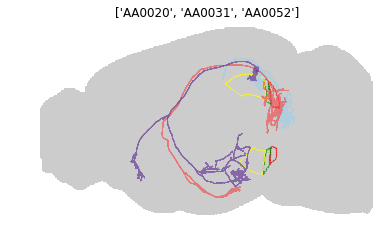

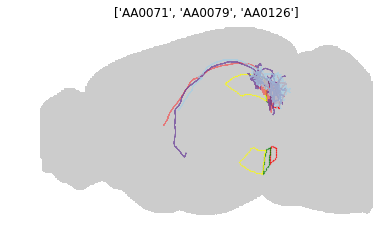

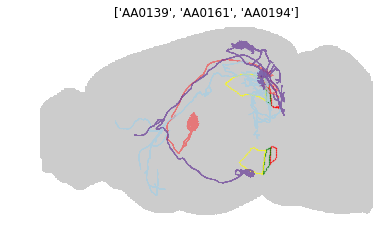

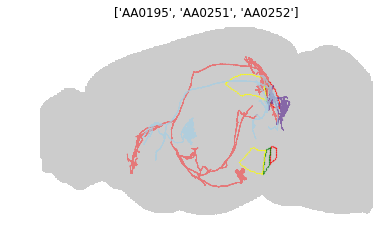

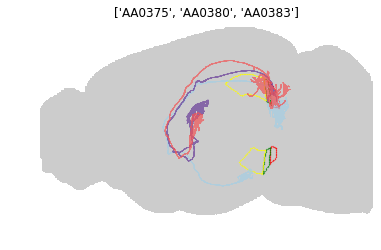

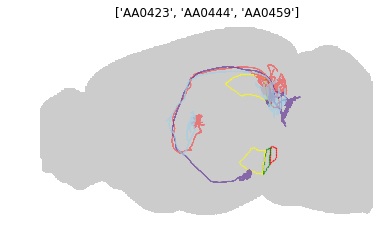

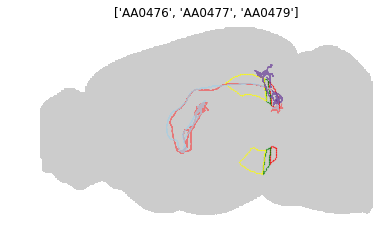

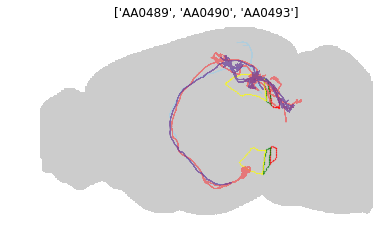

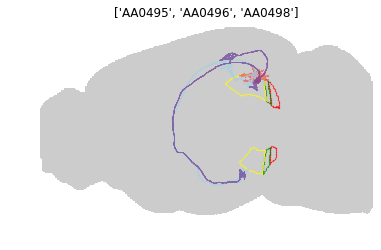

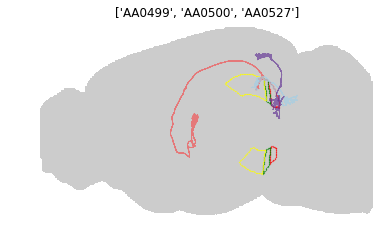

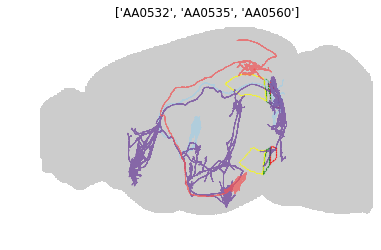

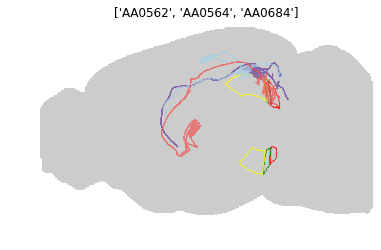

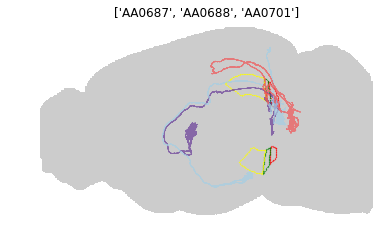

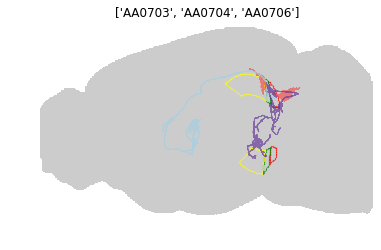

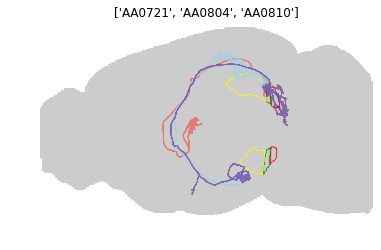

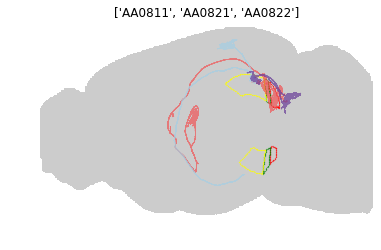

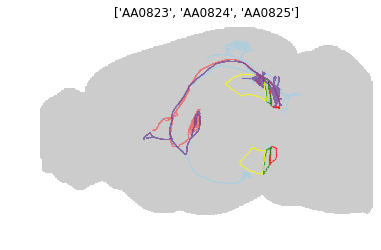

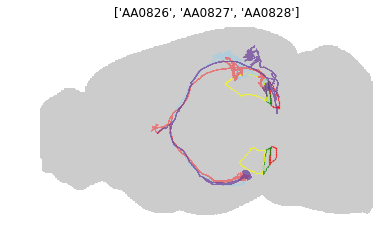

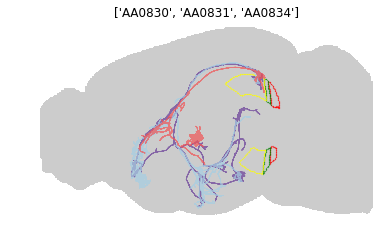

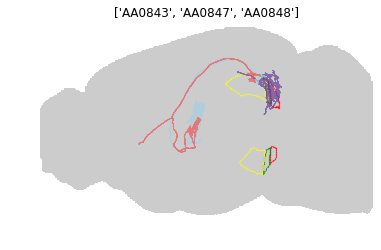

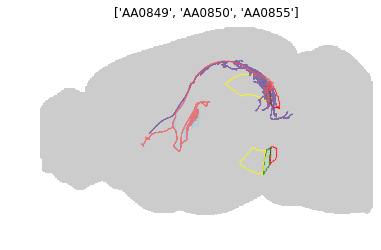

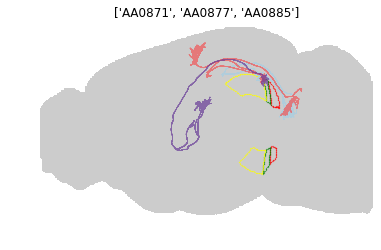

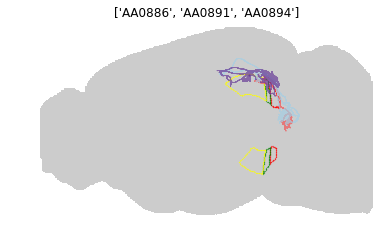

In [61]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "Sagittal"
positionINPUT = 105
outputPATH = '/home/penglab/Desktop/SUB(ProS)_neuron'
regionList
NeuronAll = []
num_neuron = 3
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iterL in NeuronAll:
    fig, ax = plt.subplots(1,1)
    if type(positionINPUT)!= int:
        for iter_P in positionINPUT:
            border_line2(viewINPUT, iter_P, regions=regionList, ax=ax, bkground_ON = False)
    else:
        border_line2(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = False)
    cell_in_map(ns.neurons,iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                view=viewINPUT, color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str(iterL))#+str(iterc))
    ax.axis('off')
    i = i+1
    plt.savefig(os.path.join(outputPATH,str(viewINPUT)+'_'+str(iterL)+'.pdf'))
    plt.show()


In [68]:
import shutil
NeuronAll = []
num_neuron = 3
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iterL in NeuronAll:
    folder = os.path.exists(os.path.join('/home/penglab/Desktop/SUB(ProS)_neuron',str(iterL)))
    if not folder:  
        os.makedirs(os.path.join('/home/penglab/Desktop/SUB(ProS)_neuron',str(iterL)))
    for iter_file in os.listdir('/home/penglab/Desktop/SUB(ProS)_neuron'): 
        if iter_file.endswith('pdf'):
            if str(iterL) in iter_file:
                old_name  = os.path.join('/home/penglab/Desktop/SUB(ProS)_neuron',iter_file)
                new_name = os.path.join(os.path.join('/home/penglab/Desktop/SUB(ProS)_neuron',str(iterL)),iter_file)
                shutil.move(old_name,new_name)


In [ ]:
iter_file

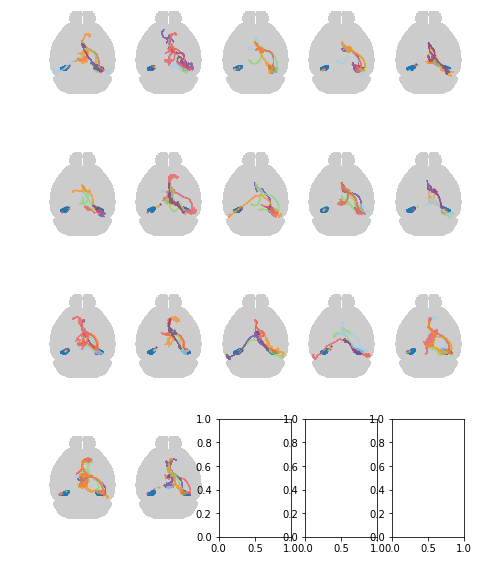

In [64]:
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "horizontal"
positionINPUT = 100
outputPATH = '/home/penglab/Desktop/Cell_in_map_18Dec.pdf'
NeuronAll = []
num_neuron = 5
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0
j = 0
fig, ax = plt.subplots(int(len(NeuronAll))//5+1,5, figsize=(7.5, 10))
#for iterc,iterL in zip(list(ns.metadata['Cluster'].unique())[:20],NeuronAll):
for iterL in NeuronAll:
    if i % 5 == 0 and i !=0:
        i = 0
        j = j+1
    border_line(viewINPUT, positionINPUT, regions=['SUB'], ax=ax[j,i], bkground_ON = False)
    cell_in_map(ns.neurons, iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="single_cell",alpha=1,ax=ax[j,i])
    #ax[j,i].title.set_text((str(iterL)))#+str(iterc))
    ax[j,i].axis('off')
    i = i+1

plt.savefig(outputPATH, bbox_inches='tight')
plt.show()

### Horizontal < 320
### Coronal < 528
### Sagittal < 456


array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440])

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

bi = np.random.binomial(n=100, p=0.5, size=10000)
n = np.random.normal(100*0.5, sqrt(100*0.5*0.5), size=10000)

In [126]:
ccf_Contour  = np.multiply(nmt.ccfArray,nmt.Contour01)
np.where(ccf_Contour[:,np.arange(0,nmt.annotation.array.shape[1],20),:] == nmt.bs.name_to_id('SUB'))[1]

array([4, 4, 4, ..., 8, 8, 8])

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


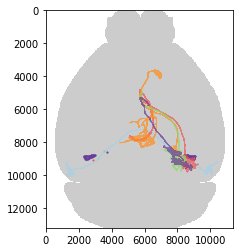

In [166]:
fig, ax = plt.subplots(1,1)
border_line2(viewINPUT, 230, regions=regionList, ax=ax, bkground_ON = False)
cell_in_map(ns.neurons, NeuronAll[0], ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="single_cell",alpha=1,ax=ax)
plt.show()

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


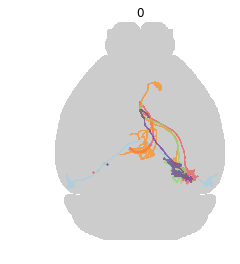

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


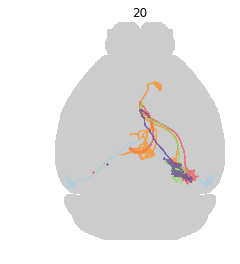

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


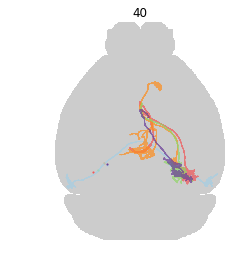

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


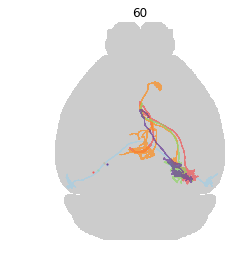

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


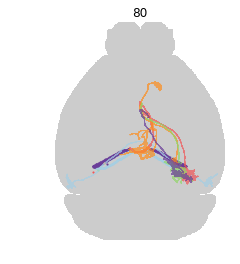

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


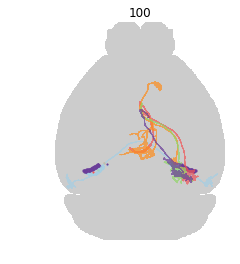

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


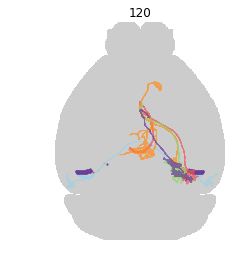

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


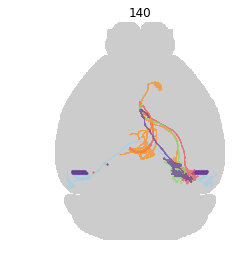

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


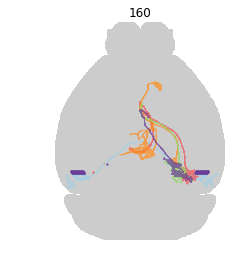

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


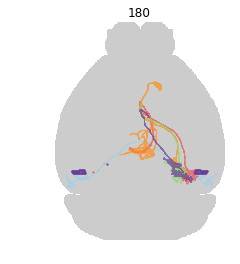

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


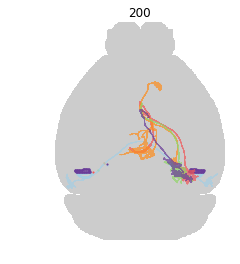

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


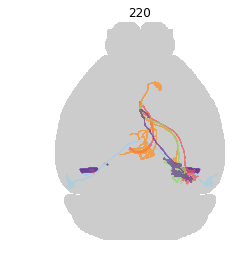

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


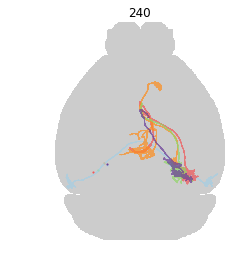

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


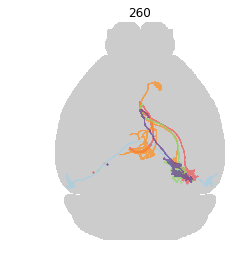

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


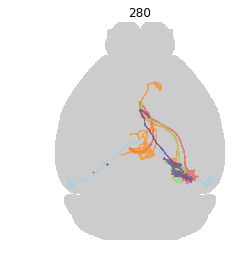

{'SUB': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725], 'ProS': [0.41568627450980394, 0.23921568627450981, 0.6]}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


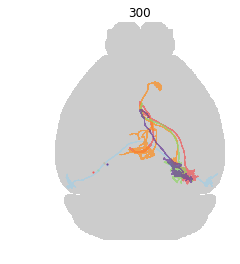

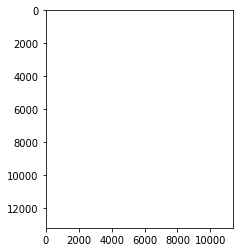

In [154]:
fig, ax = plt.subplots(1,1)

border_line(viewINPUT, 50, regions=regionList, ax=ax, bkground_ON = False)
plt.show()

In [68]:
os.path.join(outputPATH,'Cell_in_map_18Dec_' + str(i)+'.pdf')

'/home/penglab/Desktop/Cell_in_map_18Dec_17.pdf'